In [81]:
import pandas as pd
import os
from collections import defaultdict
import numpy as np
import itertools
import sklearn
import keras
import time
import shap
from keras.models import Sequential
# from keras.layers import Dense, Dropout, CuDNNLSTM, Conv1D
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mplfinance as fplt
import pandas_ta as ta

In [5]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D

In [8]:
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [211]:
BASE_DIR = "./../../data/_raw/BTCUSDT"

In [6]:
class MeasureTime:
    def __init__(self):
        self.start = time.time()
    def kill(self):
        print ('Time elapsed: ' + time.strftime("%H:%M:%S", time.gmtime(time.time()-self.start)))
        del self

In [7]:
Notebook_timer = MeasureTime()
Notebook_timer.kill()

Time elapsed: 00:00:00


In [63]:
def get_result_dict(base_dir = "./../../data/_raw/BTCUSDT"):
    result_dict = defaultdict()
    for idx, (_, dirs, files) in enumerate(os.walk(base_dir)):
        if idx == 0:
            for d in dirs:
                result_dict[d] = []
            continue
        dirname = list(result_dict.keys())[idx - 1]
        result_dict[dirname] = files
    return result_dict

In [64]:
result_dict = get_result_dict()
one_minutes_pathes = [os.path.join(BASE_DIR,"1m",filename) for filename in result_dict["1m"]]


In [207]:
one_day_pathes = [os.path.join(BASE_DIR,"1d",filename) for filename in result_dict["1d"]]
one_day = one_day_pathes[0]

In [66]:
p = one_minutes_pathes[0]
os.path.exists(p)

True

In [67]:
my_dataset = pd.read_csv(p)

In [68]:
my_dataset.head(1)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,1502942400000,4261.48,4261.48,4261.48,4261.48,1.775183,1502942459999,7564.906851,3,0.075183,320.390851,0


In [71]:
my_dataset['date'] = pd.to_datetime(my_dataset['timestamp'], unit='ms')

In [99]:
ohlc_dataset = my_dataset[["date","open","high","low","close","volume"]]
ohlc_dataset.set_index('date', inplace=True)

In [100]:
ohlc_dataset['RSI'] = ta.rsi(ohlc_dataset['close'],length=3)
ohlc_dataset['SMA'] = ta.sma(ohlc_dataset['close'],length=3)
ohlc_dataset['EMA'] = ta.ema(ohlc_dataset['close'],length=3)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [134]:
sample_df = ohlc_dataset[20:100]

In [143]:
sample_df.head(30)

,open,high,low,close,volume,RSI,SMA,EMA
date,,,,,,,,
2017-08-17 04:20:00,4264.88,4264.88,4264.88,4264.88,1.483014,65.912424,4263.746667,4263.817524
2017-08-17 04:21:00,4264.88,4266.29,4264.88,4266.29,0.845556,74.085235,4264.216667,4265.053762
2017-08-17 04:22:00,4266.29,4266.29,4266.29,4266.29,0.000000,74.085235,4265.820000,4265.671881
2017-08-17 04:23:00,4266.29,4266.29,4266.29,4266.29,0.000000,74.085235,4266.290000,4265.980941
2017-08-17 04:24:00,4266.29,4266.29,4266.29,4266.29,0.000000,74.085235,4266.290000,4266.135470
2017-08-17 04:25:00,4266.29,4266.29,4266.29,4266.29,0.467435,74.085235,4266.290000,4266.212735
2017-08-17 04:26:00,4266.29,4266.29,4266.29,4266.29,0.000000,74.085235,4266.290000,4266.251368
2017-08-17 04:27:00,4266.29,4266.29,4266.29,4266.29,0.405513,74.085235,4266.290000,4266.270684
2017-08-17 04:28:00,4266.29,4266.29,4261.32,4266.29,2.963132,74.085235,4266.290000,4266.280342


In [137]:
sma = fplt.make_addplot(sample_df["SMA"], color="orange", width=1.5,alpha=0.4)
ema = fplt.make_addplot(sample_df["EMA"], color="red", width=1.5,alpha=0.4)
rsi = fplt.make_addplot(sample_df["RSI"], color="gray", width=1.5, ylabel="RSI",
                        linestyle='dashdot',alpha=0.4)


In [138]:
normalized_df = (sample_df[['open', 'high', 'low', 'close']] - sample_df[['open', 'high', 'low', 'close']].min()) / (
                sample_df[['open', 'high', 'low', 'close']].max() - sample_df[['open', 'high', 'low', 'close']].min())

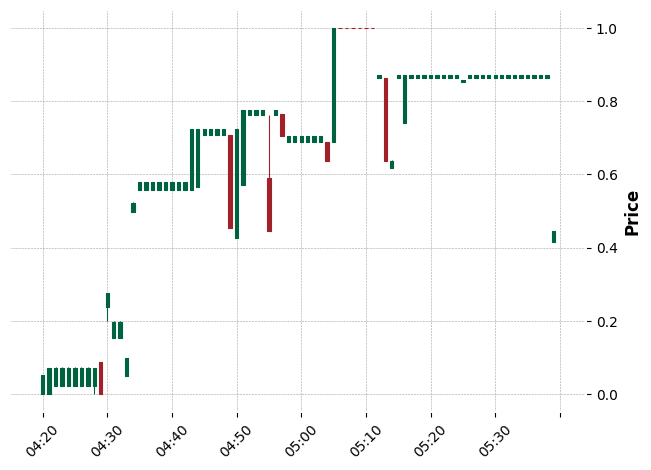

In [139]:
fplt.plot(normalized_df,
          type='candle', style='charles')

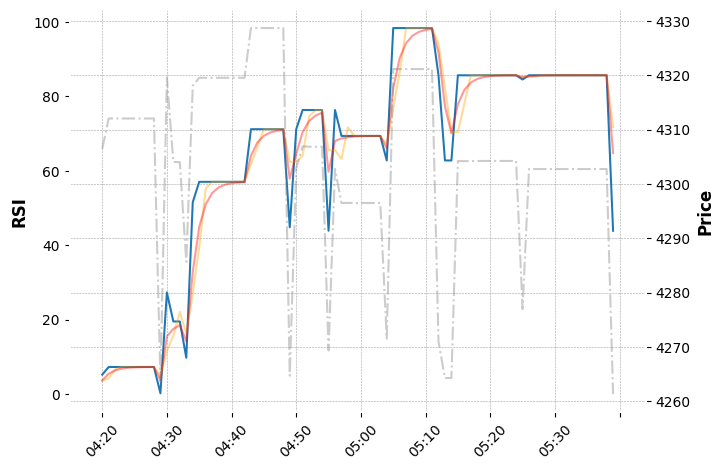

In [145]:
fplt.plot(sample_df,
        type='line',
        # color='darkgreen', 
        # linewidth=2.5,
        # volume=True,
        addplot = [sma, ema,rsi],
        style='charles',
        # style='mike',
        )

In [151]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Index(['open', 'high', 'low', 'close', 'volume', 'EMA_20', 'EMA_50', 'RSI_14'], dtype='object')


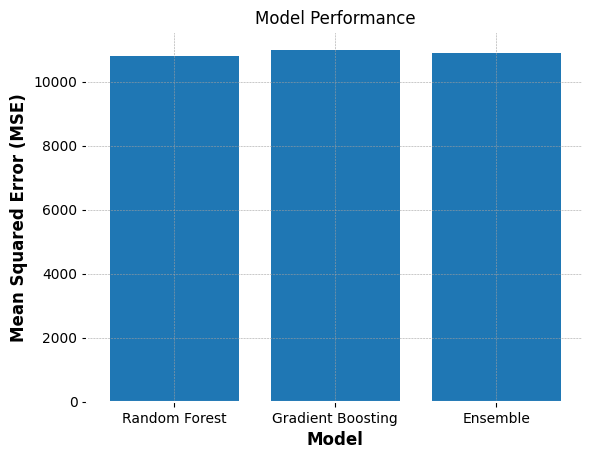

In [156]:

data = my_dataset[["date","open","high","low","close","volume"]]
data.set_index('date', inplace=True)
data.ta.ema(length=20, append=True)
data.ta.ema(length=50, append=True)
data.ta.rsi(length=14, append=True)
print(data.columns)

features = ['EMA_20', 'EMA_50', 'RSI_14']

lag_periods = 5
for feature in features:
    for i in range(1, lag_periods + 1):
        data[f'{feature}_lag_{i}'] = data[feature].shift(i)

# Drop NaN values after creating lagged features
data.dropna(inplace=True)

# Split the data into training and validation sets
train_size = int(0.8 * len(data))
train_data, val_data = data.iloc[:train_size], data.iloc[train_size:]

# Define the models for the ensemble
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

# Train and evaluate each model
model_metrics = {}
for name, model in models:
    model.fit(train_data[features], train_data['close'])
    predictions = model.predict(val_data[features])
    mse = mean_squared_error(val_data['close'], predictions)
    model_metrics[name] = mse

# Create an ensemble by averaging predictions
ensemble_predictions = np.mean([model.predict(val_data[features]) for _, model in models], axis=0)
ensemble_mse = mean_squared_error(val_data['close'], ensemble_predictions)
model_metrics['Ensemble'] = ensemble_mse

# Visualize performance metrics
plt.bar(model_metrics.keys(), model_metrics.values())
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Performance')
plt.show()


In [163]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import datetime

In [172]:
import warnings
warnings.filterwarnings('ignore')

In [265]:
day_dataset = pd.read_csv("./../data/_raw/BTCUSDT/1d/RAW_BTCUSDT_1d_0.csv")
day_dataset['date'] = pd.to_datetime(day_dataset['timestamp'], unit='ms').dt.strftime('%d/%m/%Y/%H/%M/%S')
day_dataset.tail(10)
# day_dataset['date'] = day_dataset['date'].apply(lambda row:pd.Timestamp(row)

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,date
2155,1689120000000,30622.10,30983.25,30210.00,30380.00,38108.99669,1689206399999,1.166497e+09,784195,18251.27965,5.587425e+08,0,12/07/2023/00/00/00
2156,1689206400000,30380.00,31804.20,30251.00,31454.23,70772.51836,1689292799999,2.194927e+09,1301632,36084.84178,1.119543e+09,0,13/07/2023/00/00/00
2157,1689292800000,31454.23,31630.00,29900.00,30312.01,60749.48424,1689379199999,1.869443e+09,1274387,28513.77996,8.776420e+08,0,14/07/2023/00/00/00
2158,1689379200000,30312.00,30390.90,30200.00,30289.52,14118.55329,1689465599999,4.279211e+08,488354,6430.54981,1.949127e+08,0,15/07/2023/00/00/00
2159,1689465600000,30289.52,30441.46,30064.29,30231.99,15760.12810,1689551999999,4.771893e+08,494225,7322.44372,2.217137e+08,0,16/07/2023/00/00/00
2160,1689552000000,30232.00,30336.96,29659.20,30138.00,30882.76839,1689638399999,9.296476e+08,816466,14352.21893,4.321060e+08,0,17/07/2023/00/00/00
2161,1689638400000,30138.01,30239.78,29512.00,29859.13,30003.86010,1689724799999,8.971571e+08,754775,13771.19621,4.117489e+08,0,18/07/2023/00/00/00
2162,1689724800000,29859.14,30189.09,29761.96,29909.21,25657.36137,1689811199999,7.692549e+08,617415,12260.98321,3.676242e+08,0,19/07/2023/00/00/00
2163,1689811200000,29909.21,30417.46,29570.96,29800.00,37540.68193,1689897599999,1.125951e+09,749723,18061.33493,5.417424e+08,0,20/07/2023/00/00/00
2164,1689897600000,29800.00,30061.70,29726.34,29901.72,23881.40865,1689983999999,7.131234e+08,555611,11566.38840,3.454041e+08,0,21/07/2023/00/00/00


In [215]:
df = day_dataset.copy()

In [216]:
features = ['open', 'high', 'low', 'close', 'volume']

In [217]:
import seaborn as sb
 

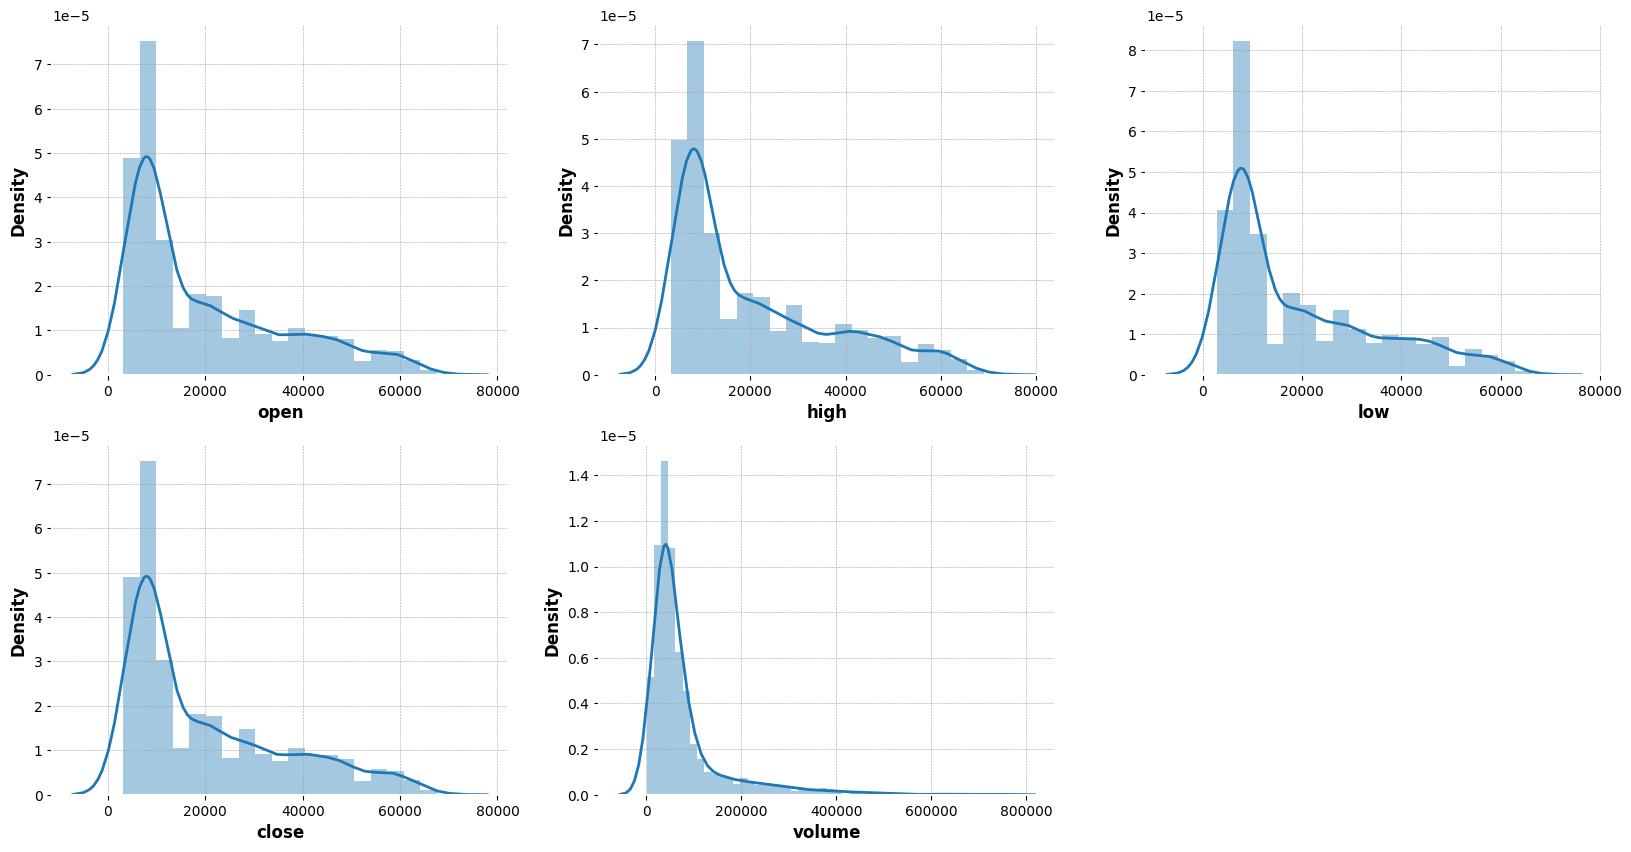

In [218]:
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

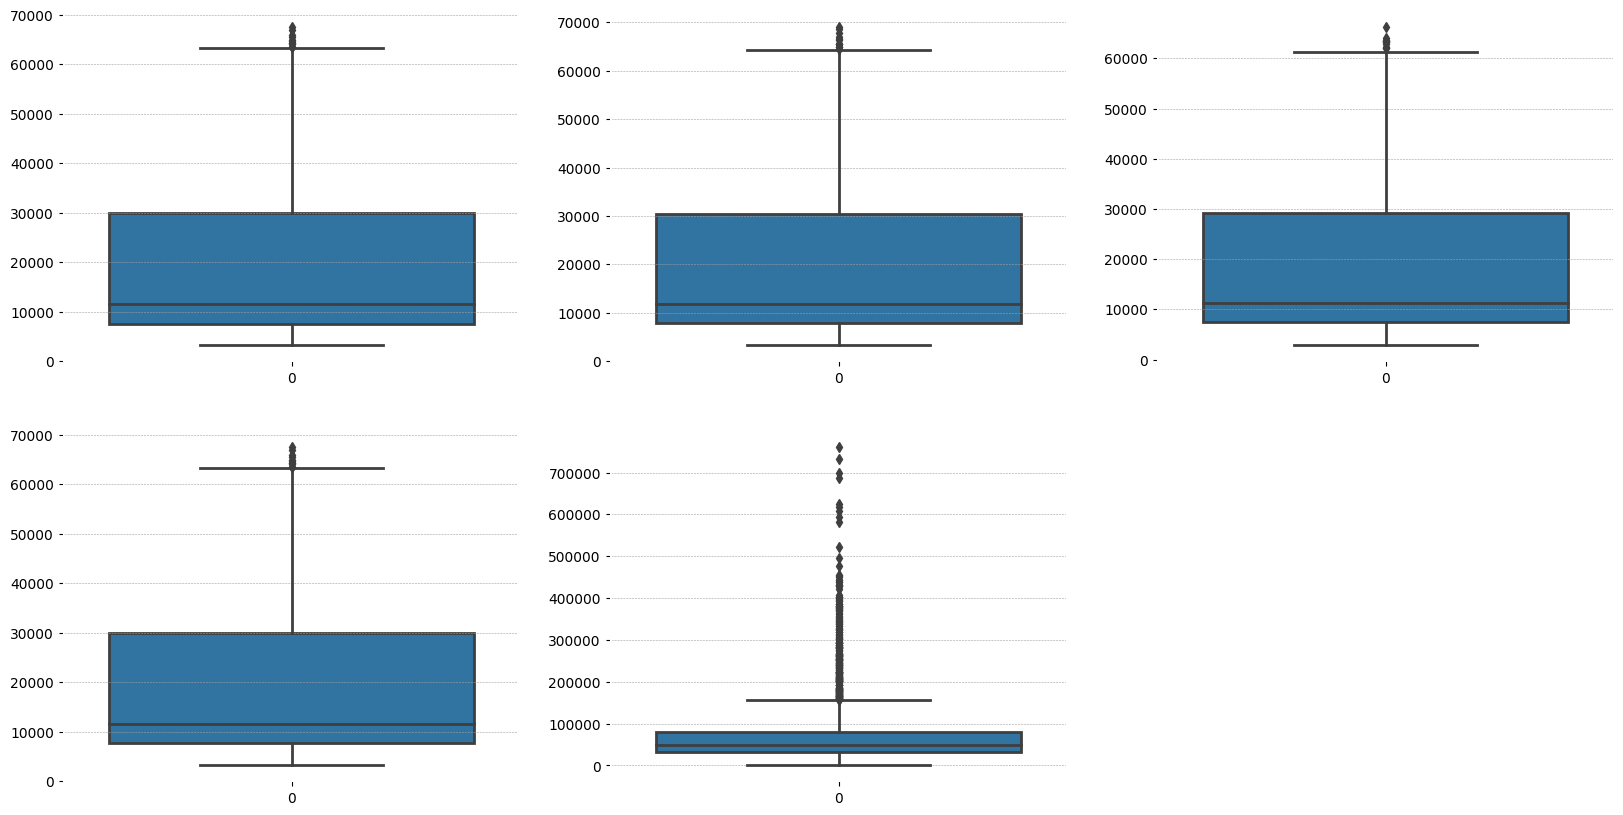

In [219]:

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [220]:
splitted = df['date'].str.split('/', expand=True)
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')
df['hour'] = splitted[1].astype('int')
df['minute'] = splitted[0].astype('int')
df['second'] = splitted[2].astype('int')

In [225]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.tail()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,date,day,month,year,is_quarter_end
2160,1689552000000,30232.00,30336.96,29659.20,30138.00,30882.76839,1689638399999,9.296476e+08,816466,14352.21893,4.321060e+08,0,17/07/2023,7,17,2023,0
2161,1689638400000,30138.01,30239.78,29512.00,29859.13,30003.86010,1689724799999,8.971571e+08,754775,13771.19621,4.117489e+08,0,18/07/2023,7,18,2023,1
2162,1689724800000,29859.14,30189.09,29761.96,29909.21,25657.36137,1689811199999,7.692549e+08,617415,12260.98321,3.676242e+08,0,19/07/2023,7,19,2023,0
2163,1689811200000,29909.21,30417.46,29570.96,29800.00,37540.68193,1689897599999,1.125951e+09,749723,18061.33493,5.417424e+08,0,20/07/2023,7,20,2023,0
2164,1689897600000,29800.00,30061.70,29726.34,29901.72,23881.40865,1689983999999,7.131234e+08,555611,11566.38840,3.454041e+08,0,21/07/2023,7,21,2023,1


In [222]:
df['date'].max()

'31/12/2022'

In [226]:
df['open-close']  = df['open'] - df['close']
df['low-high']  = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)

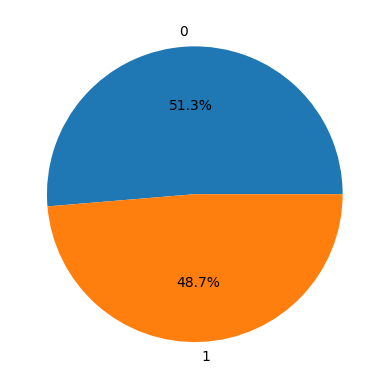

In [227]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

In [245]:
df.groupby('year')[df.select_dtypes(include=np.number).columns.tolist()].agg('mean')

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,day,month,year,is_quarter_end,open-close,low-high,target
year,,,,,,,,,,,,,,,,,,,
2017,1.508803e+12,7553.062920,7946.931606,7112.549051,7622.664015,4352.123025,1.508890e+12,5.292037e+07,3.110672e+04,2230.749044,2.745329e+07,0.0,10.233577,16.656934,2017.0,0.328467,-69.601095,-834.382555,0.562044
2018,1.530490e+12,7565.722712,7789.655616,7261.299781,7538.113945,36456.095432,1.530576e+12,2.623529e+08,2.393150e+05,18760.053961,1.345425e+08,0.0,6.526027,15.720548,2018.0,0.326027,27.608767,-528.355836,0.504110
2019,1.562026e+12,7354.844685,7547.611808,7152.498493,7364.363205,41999.968608,1.562112e+12,3.326979e+08,3.585238e+05,21464.109207,1.694020e+08,0.0,6.526027,15.720548,2019.0,0.326027,-9.518521,-395.113315,0.517808
2020,1.593605e+12,11051.096148,11330.868907,10782.702240,11110.548497,70310.568477,1.593691e+12,7.827410e+08,8.587664e+05,34259.875075,3.820804e+08,0.0,6.513661,15.756831,2020.0,0.325137,-59.452350,-548.166667,0.576503
2021,1.625184e+12,47352.319562,48806.641726,45674.194219,47400.003041,69924.032873,1.625270e+12,3.162873e+09,1.838111e+06,34412.108267,1.557403e+09,0.0,6.526027,15.720548,2021.0,0.326027,-47.683479,-3132.447507,0.504110
2022,1.656720e+12,28266.515041,28896.238192,27520.177699,28185.217890,146441.630310,1.656806e+12,3.285960e+09,3.289024e+06,72768.444701,1.631081e+09,0.0,6.526027,15.720548,2022.0,0.326027,81.297151,-1376.060493,0.457534
2023,1.681214e+12,25896.660594,26402.469505,25472.556931,25962.819010,154227.343388,1.681301e+12,3.664663e+09,3.804492e+06,76702.503599,1.821965e+09,0.0,3.871287,15.123762,2023.0,0.326733,-66.158416,-929.912574,0.490099


In [244]:
df.groupby('is_quarter_end')[df.select_dtypes(include=np.number).columns.tolist()].agg('mean')

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,day,month,year,is_quarter_end,open-close,low-high,target
is_quarter_end,,,,,,,,,,,,,,,,,,,
0,1.596379e+12,20008.849088,20559.087409,19407.587039,20039.092022,76148.931863,1.596466e+12,1.667356e+09,1.467267e+06,37896.634007,8.265385e+08,0.0,6.503770,15.409184,2020.090473,0.0,-30.242934,-1151.500370,0.522961
1,1.596482e+12,20063.126289,20585.087450,19444.273895,20037.152550,76476.588001,1.596569e+12,1.660538e+09,1.467352e+06,38031.395180,8.221759e+08,0.0,6.525496,16.393768,2020.089235,1.0,25.973739,-1140.813555,0.492918


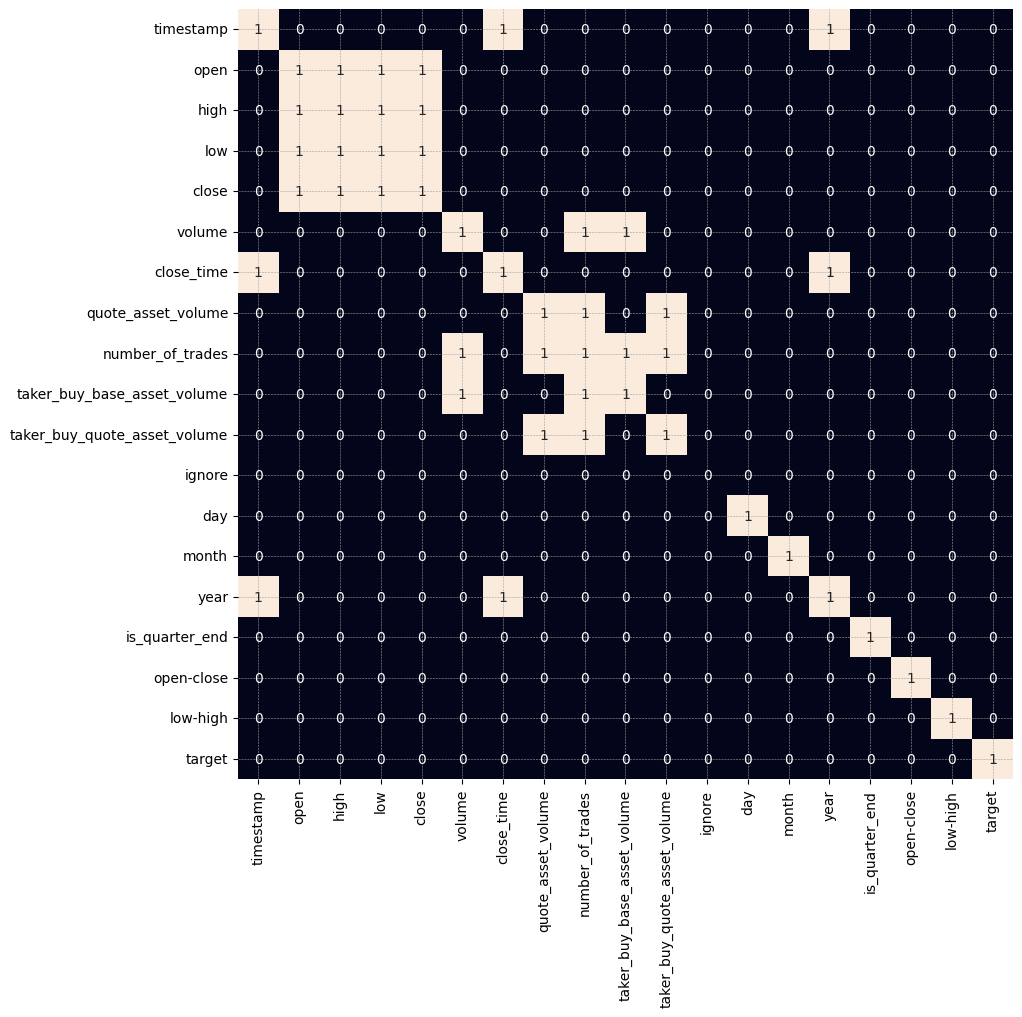

In [247]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr(numeric_only=True) > 0.9, annot=True, cbar=False)
plt.show()

In [248]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

In [249]:
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1948, 3) (217, 3)


In [250]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()
  # confusion_matrix(models[0], X_valid, Y_valid)

LogisticRegression() : 
Training Accuracy :  0.5396230753248178
Validation Accuracy :  0.5958099131323454

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5373897718391768
Validation Accuracy :  0.609138136603645

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accurac